# Single molecule data: osmFISH mouse somato-sensory cortex

This example uses TACCO to annotate and analyse mouse somato-sensory cortex osmFISH data (Codeluppi et al.).

(Codeluppi et al.): Simone Codeluppi, Lars E. Borm, Amit Zeisel, Gioele La Manno, Josina A. van Lunteren, Camilla I. Svensson & Sten Linnarsson. Spatial organization of the somatosensory cortex revealed by osmFISH. Nat Methods 15, 932–935 (2018). https://doi.org/10.1038/s41592-018-0175-z

In [1]:
import os
import sys
import json

import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc

import tacco as tc

import matplotlib

import seaborn as sns

# The notebook expects to be executed either in the workflow directory or in the repository root folder...
sys.path.insert(1, os.path.abspath('workflow' if os.path.exists('workflow/common_code.py') else '..')) 
import common_code

## Load data

In [2]:
data_path = common_code.find_path('results/osmFISH')

In [3]:
# load segmented data
reference = ad.read(f'{data_path}/data/reference.h5ad')
# load single molecule data
rna_coords = pd.read_csv(f'{data_path}/data/rna_coords.csv.gz')
rna_coords['ClusterName'] = rna_coords['ClusterName'].fillna('')

## Plotting options

In [4]:
highres = False
default_dpi = 100.0 # matplotlib.rcParams['figure.dpi']
if highres:
    matplotlib.rcParams['figure.dpi'] = 648.0
    hr_ext = '_hd'
else:
    matplotlib.rcParams['figure.dpi'] = default_dpi
    hr_ext = ''

axsize = np.array([4,3])*0.5

In [5]:
color_dict = {'Inhibitory CP': '#982581',
             'Inhibitory Crhbp': '#83469b',
             'Inhibitory Cnr1':'#cb467c',
             'Inhibitory IC': '#ee519f',
             'Inhibitory Kcnip2': '#9681bd',
             'Inhibitory Pthlh': '#533594',
             'Inhibitory Vip':'#765aa6',

             'Pyramidal Cpne5':'#3a449b',
             'Pyramidal L2-3': '#10b6e7',
             'Pyramidal L2-3 L5':'#1f6a89',
             'Pyramidal Kcnip2':'#6988c4',
             'Pyramidal L3-4': '#2255a6',
             'pyramidal L4': '#8ad7ef',
             'Pyramidal L5': '#18a0b5',
             'Pyramidal L6':'#1980c4',
             'Hippocampus': '#094d73',

             'Astrocyte Gfap': '#dd4827',
             'Astrocyte Mfge8': '#f5914b',

             'Oligodendrocyte Precursor cells': '#b7d541',
             'Oligodendrocyte COP': '#6dbe45',
             'Oligodendrocyte NF': '#62a64e',
             'Oligodendrocyte MF':'#2d744b',
             'Oligodendrocyte Mature': '#27562b',

             'Perivascular Macrophages':'#752b17',
             'Microglia':'#a7633e',

             'C. Plexus': '#21b284',
             'Ependymal':'#f6e10b',

             'Pericytes':'#fac696',
             'Endothelial':'#ed2426',
             'Endothelial 1':'#f05658',
             'Vascular Smooth Muscle':'#adc471',
             
             '': '#D3D3D3'}

In [6]:
method_props = pd.DataFrame({
    'ClusterName': ['osmFISH-recovered cells','single molecule annotations from mapping back the published Watershed-segmentation based annotations', 'osmFISH-recovered cells',],
    'tacco': ['TACCO', 'single molecule annotations without segmentation', 'TACCO sm annotation', ],
}, index=['nice_name','description','title']).T

## Run single molecule annotation

In [7]:
anno_col = 'tacco'
annotation_parameters = { 'bin_size': 10, 'n_shifts': 3, 'platform_iterations': -1, }
tc.tl.annotate_single_molecules(rna_coords, reference=reference, method='OT', annotation_key='ClusterName', result_key=anno_col,
                                bin_size=10, # positions are in µm and we expect features at around 10µm, i.e. cells
                                n_shifts=3, # compromise between speed (lower values) and artefact reduction (higher values)
                                platform_iterations=-1, # no platform normalization is necessary as data and reference share identical platform effects
                               )

Starting preprocessing
Annotation profiles were not found in `reference.varm["ClusterName"]`. Constructing reference profiles with `tacco.preprocessing.construct_reference_profiles` and default arguments...
Finished preprocessing in 0.03 seconds.
Starting annotation of data with shape (29556, 33) and a reference of shape (4839, 33) using the following wrapped method:
+- multi center: multi_center=None multi_center_amplitudes=True
   +- bisection boost: bisections=4, bisection_divisor=3
      +- core: method=OT annotation_prior=None
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.19753086419753085
bisection run on 0.09876543209876543
Finished annotation in 3.68 seconds.
scale.....time 7.3515565395355225
fuseall...time 0.16793322563171387
Starting preprocessing
Finished preprocessing in 0.02 seconds.
Starting annotation of data with shape (29582, 33) and a reference of shape (4839, 33) using

gene         x         y        hash    cell  ClusterName  \
0        Acta2  1183.975  1303.380   900442447     NaN                
1        Acta2  1619.540  1105.975  1241232167     NaN                
2        Acta2   546.000  2893.930   401305462     NaN                
3        Acta2  1473.355  1508.520  1126860967     NaN                
4        Acta2   411.840  2441.075   296329647     NaN                
...        ...       ...       ...         ...     ...          ...   
1536369    Vtn   685.425  1245.140   510368361     NaN                
1536370    Vtn  1361.945   274.235  1039673080  5664.0                
1536371    Vtn   936.975  1375.335   707186954     NaN                
1536372    Vtn   297.830   775.320   207100842     NaN                
1536373    Vtn  1142.635  1268.345   868096856  5159.0  Endothelial   

                  tacco  
0           Endothelial  
1          Pyramidal L6  
2             Ependymal  
3           Endothelial  
4        Astrocyte Gfap  
...                 ...  
1536369       Pericytes  
1536370  Astrocyte Gfap  
1536371       Pericytes  
1536372  Astrocyte Gfap  
1536373    Pyramidal L6  

[1536374 rows x 7 columns]

## Spatial overview

Plot the single-molecule annotations for the reference and TACCO

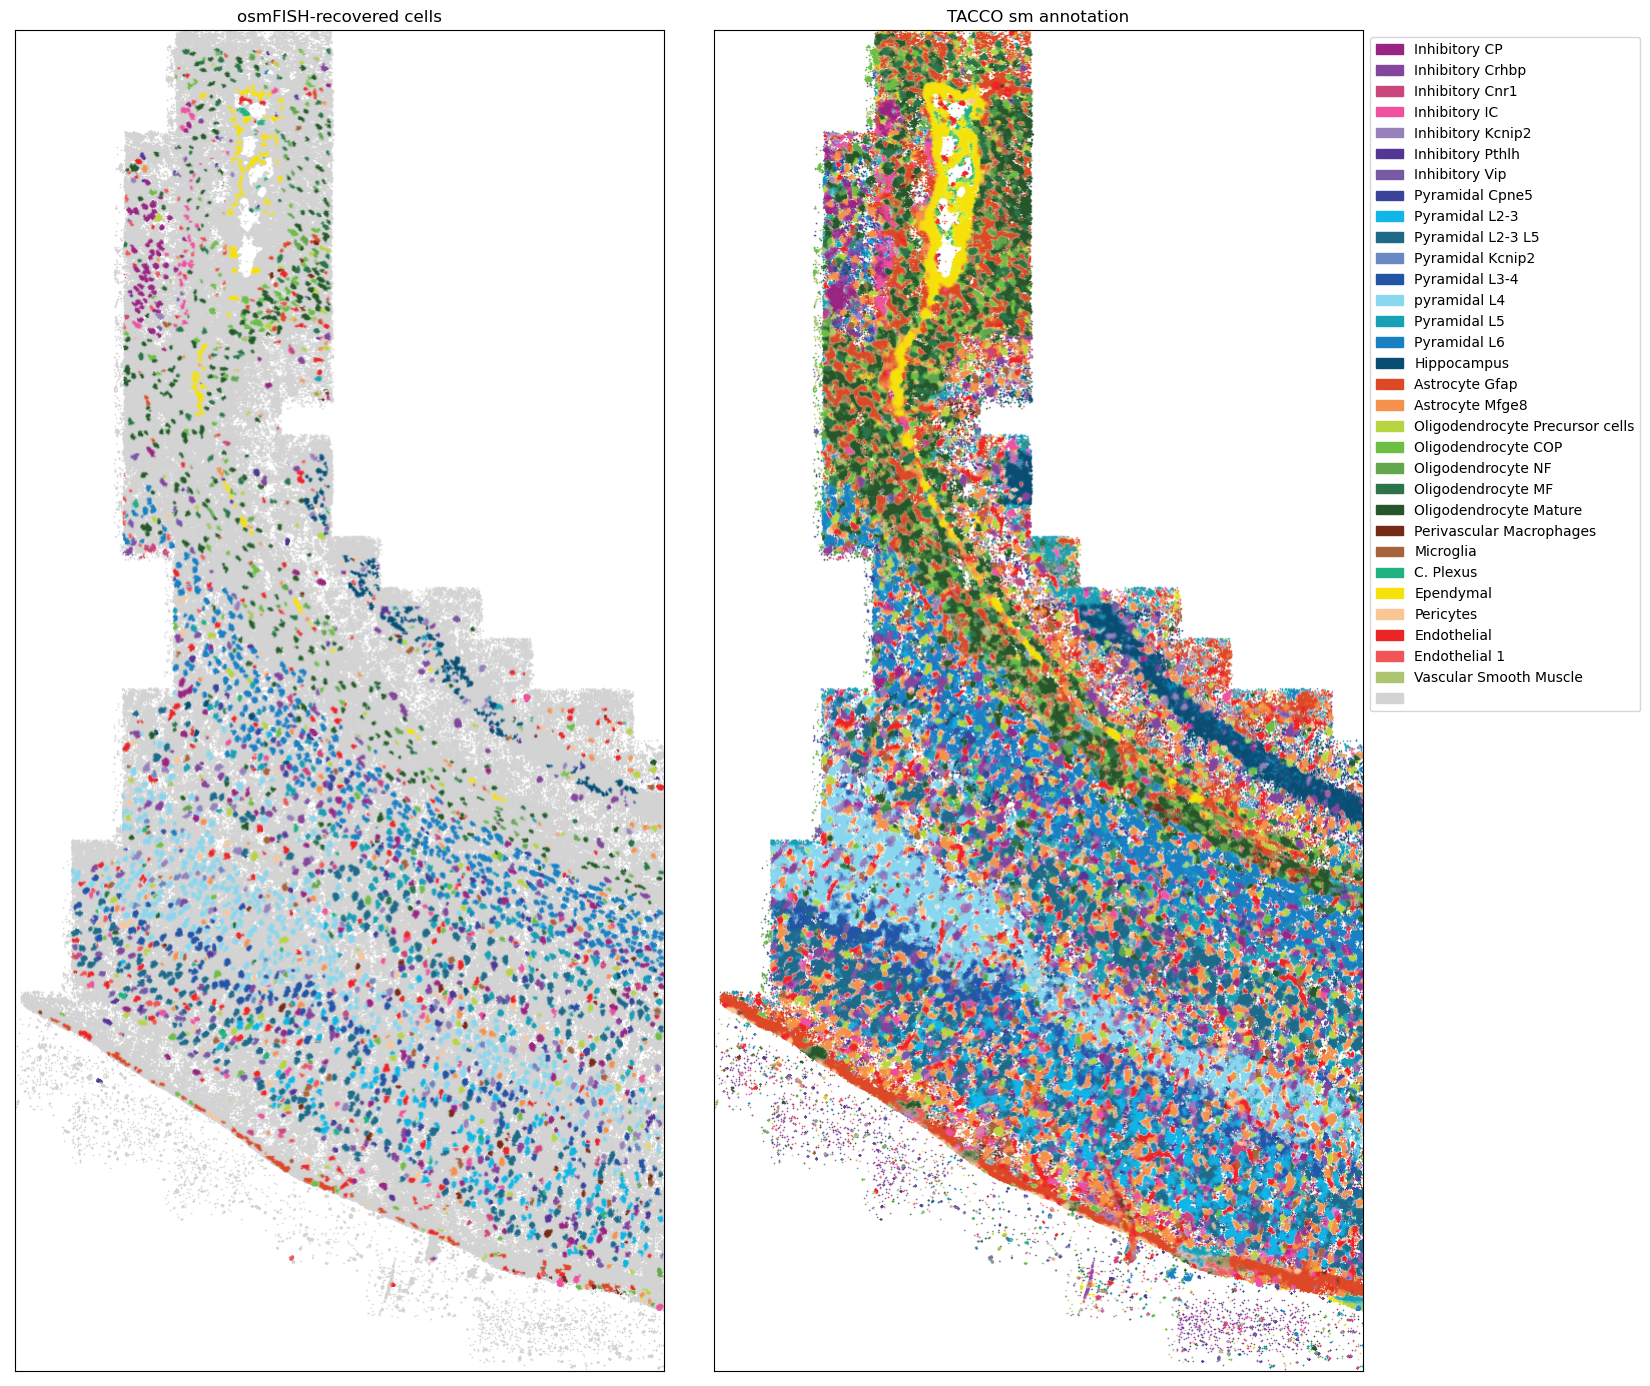

In [8]:
fig = tc.pl.scatter(rna_coords, keys=['ClusterName', anno_col], axsize=4e-3, joint=True, noticks=True, legend=True, colors=color_dict, point_size=1, method_labels=method_props['title']);
fig.savefig(f'{data_path}/single_molecule_full{hr_ext}.pdf',bbox_inches='tight')

Zoom in to see the single molecules

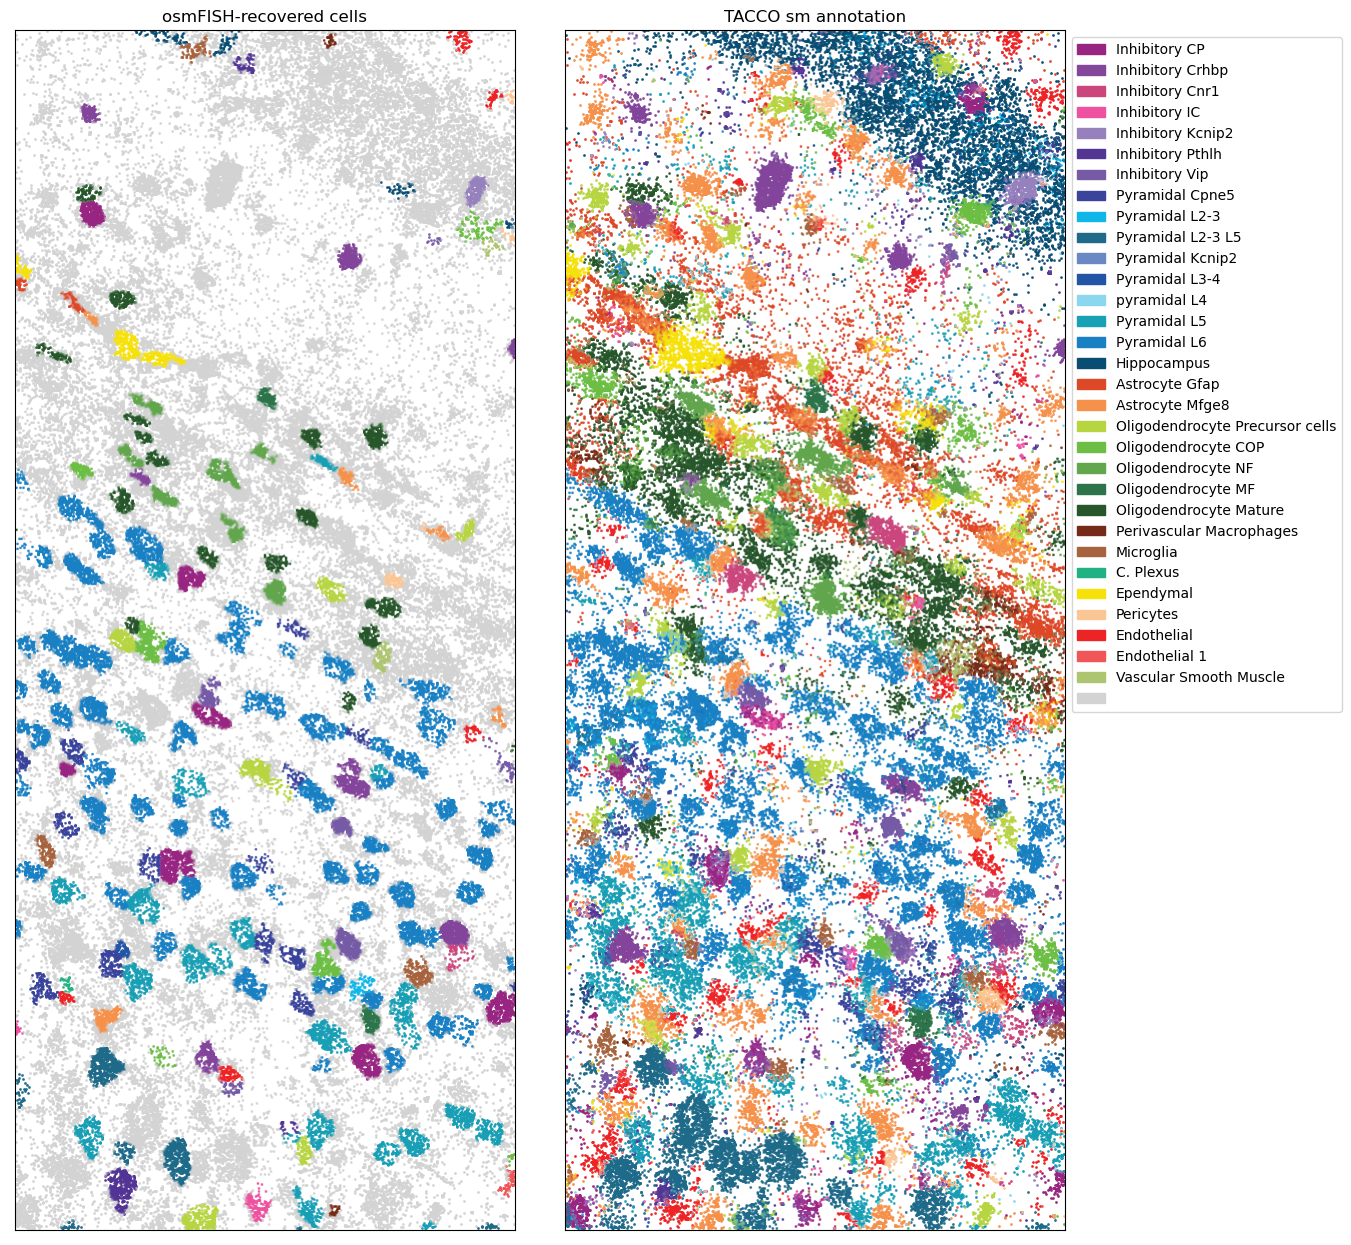

In [9]:
xmin,xmax = 1150,1400
ymin,ymax = 1000,1600 #1170,1690
query = 'x > @xmin & x < @xmax & y > @ymin & y < @ymax'

fig = tc.pl.scatter(rna_coords.query(query), keys=['ClusterName', anno_col], axsize=2e-2, joint=True, noticks=True, legend=True, colors=color_dict, method_labels=method_props['title']);
fig.savefig(f'{data_path}/single_molecule_sub{hr_ext}.pdf',bbox_inches='tight')

Plotting astrocyte markers

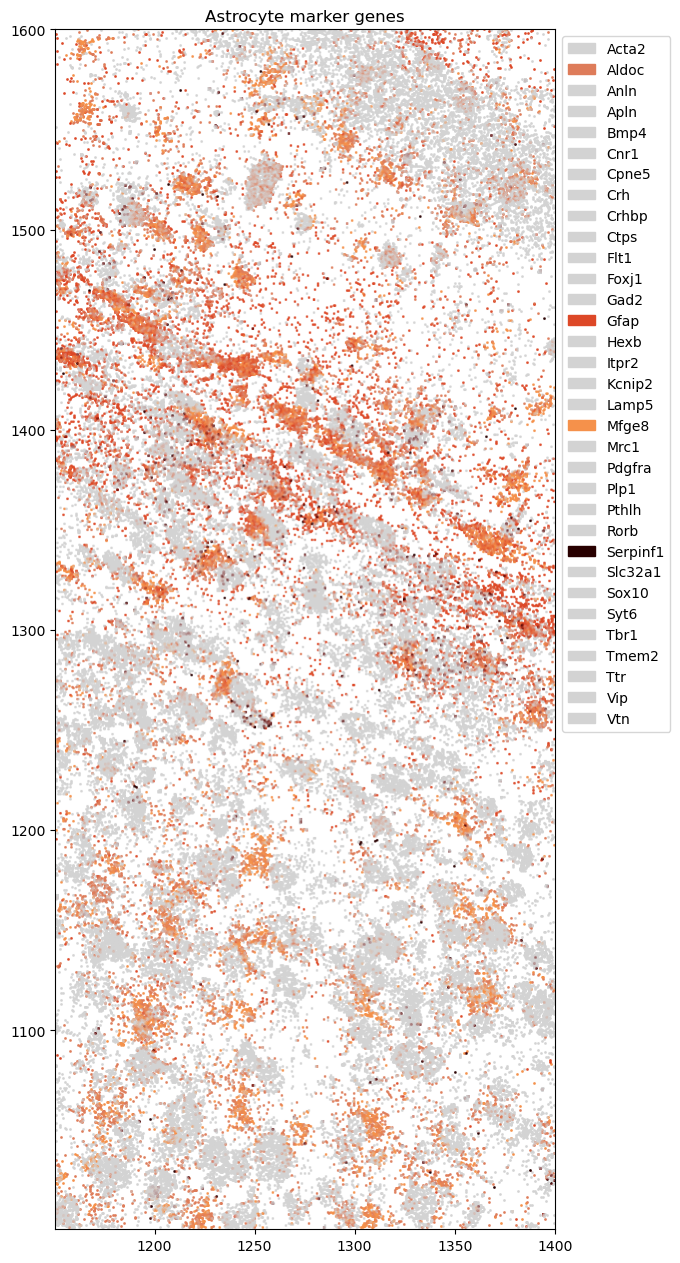

In [10]:
astro_gene_colors = { 'Gfap': '#dd4827', 'Mfge8': '#f5914b', 'Aldoc': '#DE7C5A', 'Serpinf1': '#280000' }
astro_genes = list(astro_gene_colors.keys())

genes = rna_coords['gene'].unique()
gene_color_dict = {g:'#D3D3D3' for g in genes}
for g,c in astro_gene_colors.items():
    gene_color_dict[g] = c
fig = tc.pl.scatter(rna_coords.query(query), keys='gene', colors=gene_color_dict, axsize=2e-2, joint=True);
fig.get_axes()[0].set_title('Astrocyte marker genes')
fig.savefig(f'{data_path}/single_molecule_ast{hr_ext}.pdf',bbox_inches='tight')

## Run single molecule segmentation

In [11]:
seg_col = f'{anno_col}_seg'
tc.tl.segment(rna_coords, result_key=seg_col,
              distance_scale=2.0, # The size of a molecular neighborhood of 2µm - should be smaller than a cell, but large enough to have a few molecules in it.
              max_size=1600, # Maximum size of a "cell"
              position_scale=10.0, # The expected feature size to use for splitting the problem spatially: cells are expected to be about 10µm large.
              position_range=2, # Relative size range for objects wrt. postion_scale in the clustering
              annotation_key=anno_col, annotation_distance=None, # Do not connect nearby molecules with different annotation in the same "cell"
             )

The heuristic value for the parameter `numba_blocksize` is 8.0. Consider specifying this directly as argument to avoid (possibly significant) overhead and/or experiment with this value on (a subset of) the actual dataset at hand to obtain an optimal value in terms of speed and memory requirements.
The heuristic value for the parameter `numba_blocksize` is 8.0. Consider specifying this directly as argument to avoid (possibly significant) overhead and/or experiment with this value on (a subset of) the actual dataset at hand to obtain an optimal value in terms of speed and memory requirements.
The heuristic value for the parameter `numba_blocksize` is 32.0. Consider specifying this directly as argument to avoid (possibly significant) overhead and/or experiment with this value on (a subset of) the actual dataset at hand to obtain an optimal value in terms of speed and memory requirements.
The heuristic value for the parameter `numba_blocksize` is 4.0. Consider specifying this directly as a

gene         x         y        hash    cell  ClusterName  \
0        Acta2  1183.975  1303.380   900442447     NaN                
1        Acta2  1619.540  1105.975  1241232167     NaN                
2        Acta2   546.000  2893.930   401305462     NaN                
3        Acta2  1473.355  1508.520  1126860967     NaN                
4        Acta2   411.840  2441.075   296329647     NaN                
...        ...       ...       ...         ...     ...          ...   
1536369    Vtn   685.425  1245.140   510368361     NaN                
1536370    Vtn  1361.945   274.235  1039673080  5664.0                
1536371    Vtn   936.975  1375.335   707186954     NaN                
1536372    Vtn   297.830   775.320   207100842     NaN                
1536373    Vtn  1142.635  1268.345   868096856  5159.0  Endothelial   

                  tacco tacco_seg  
0           Endothelial         0  
1          Pyramidal L6         1  
2             Ependymal         2  
3           Endothelial         3  
4        Astrocyte Gfap         4  
...                 ...       ...  
1536369       Pericytes     54727  
1536370  Astrocyte Gfap      2214  
1536371       Pericytes      3025  
1536372  Astrocyte Gfap       631  
1536373    Pyramidal L6      5873  

[1536374 rows x 8 columns]

## Analysis on the cell-like level

Process the segmented data using the recipe given in (Codeluppi et al.)

In [12]:
def prep_codeluppi(adata, min_counts=0):
    adata = adata[tc.sum(adata.X,axis=1)>=min_counts]
    adata = sc.AnnData(adata.X.astype(np.float32),obs=adata.obs,var=adata.var,obsm=adata.obsm)
    sums0 = tc.sum(adata.X,axis=0)
    sums1 = tc.sum(adata.X,axis=1)
    tc.utils.col_scale(adata.X, 1/sums0)
    tc.utils.row_scale(adata.X, 1/sums1)
    adata.X *= np.prod(adata.X.shape)
    sc.tl.tsne(adata)
    return adata
def construct_segmented_data(seg_col, ann_col):
    count_data = tc.tl.dataframe2anndata(rna_coords, obs_key=seg_col, var_key='gene', compositional_keys=['ClusterName', anno_col], mean_keys=['x','y'])
    # by construction of the TACCO segmentation, only cells composed of molecules typed with a single type are reconstructed
    tc.utils.get_maximum_annotation(count_data, ann_col, ann_col)
    del count_data.obsm[ann_col]
    return count_data
segmented_min_counts = 20

seg_props = pd.DataFrame([
    [ 'TonT', 'TACCO segmentation\non TACCO annotation', seg_col, anno_col, 'TACCO segmentation', 'TACCO'],
], columns=['key','nice_name','seg_col','ann_col','nice_seg','nice_ann']).set_index('key')
seg_datas = { key: construct_segmented_data(seg_col, ann_col) for key,seg_col,ann_col in zip(seg_props.index,seg_props['seg_col'],seg_props['ann_col']) }

norm_datas = { key: prep_codeluppi(seg_data, segmented_min_counts) for key,seg_data in seg_datas.items() }
norm_datas['reference'] = prep_codeluppi(reference, segmented_min_counts)

ext_seg_props = seg_props.copy()
ext_seg_props.loc['reference'] = {'nice_name':'osmFISH-recovered cells','seg_col':'cell','ann_col':'ClusterName','nice_seg':'osmFISH-recovered cells','nice_ann':'osmFISH-recovered cells'}
ext_seg_props = ext_seg_props.loc[[ext_seg_props.index[-1],*ext_seg_props.index[:-1],]]
seg_datas['reference'] = reference

Compare the TACCO segmentation to the watershed segmentation results from (Codeluppi et al.)

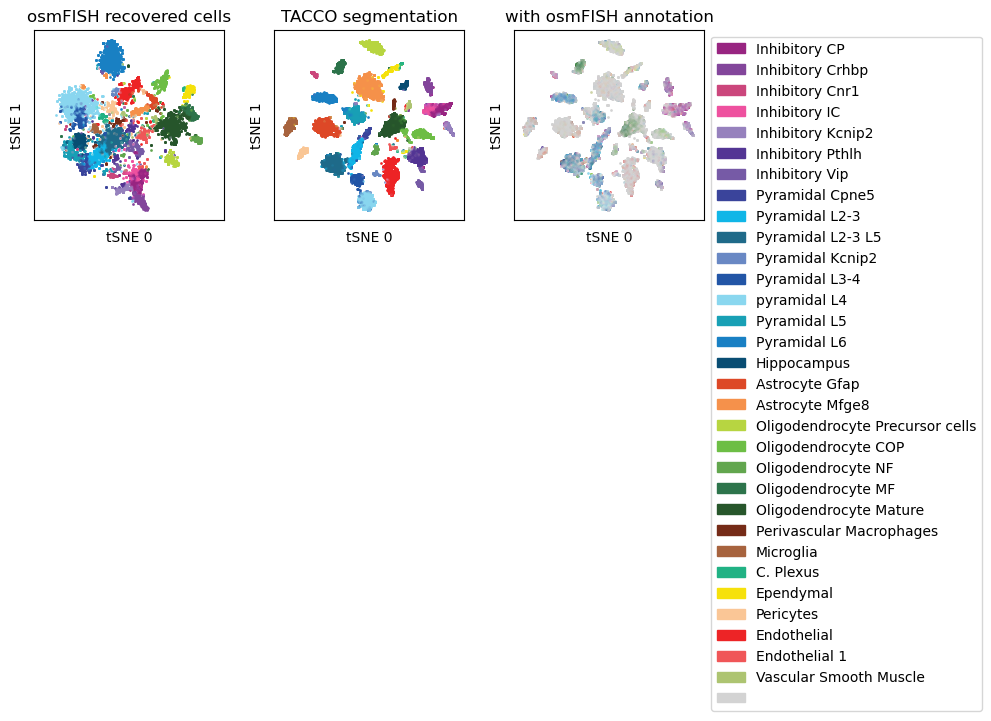

In [13]:
fig,axs = tc.pl.subplots(3, axsize=(1.9,1.9), x_padding=0.5)
tc.pl.scatter(norm_datas['reference'],'ClusterName', position_key='X_tsne', colors=color_dict, joint=True, noticks=True, margin=0.1, axes_labels=['tSNE 0','tSNE 1'], ax=axs[0,0], legend=False, );
tc.pl.scatter(norm_datas['TonT'],     anno_col,      position_key='X_tsne', colors=color_dict, joint=True, noticks=True, margin=0.1, axes_labels=['tSNE 0','tSNE 1'], ax=axs[0,1], legend=False, );
tc.pl.scatter(norm_datas['TonT'],     'ClusterName', position_key='X_tsne', colors=color_dict, joint=True, noticks=True, margin=0.1, axes_labels=['tSNE 0','tSNE 1'], ax=axs[0,2], legend=True, );
axs[0,0].set_title('osmFISH recovered cells')
axs[0,1].set_title('TACCO segmentation')
axs[0,2].set_title('with osmFISH annotation')
fig.savefig(f'{data_path}/single_molecule_tsne{hr_ext}.pdf',bbox_inches='tight')

Cross-comparison of annotations of different methods with combinations of segmentation methods and annotations used in the segmentation

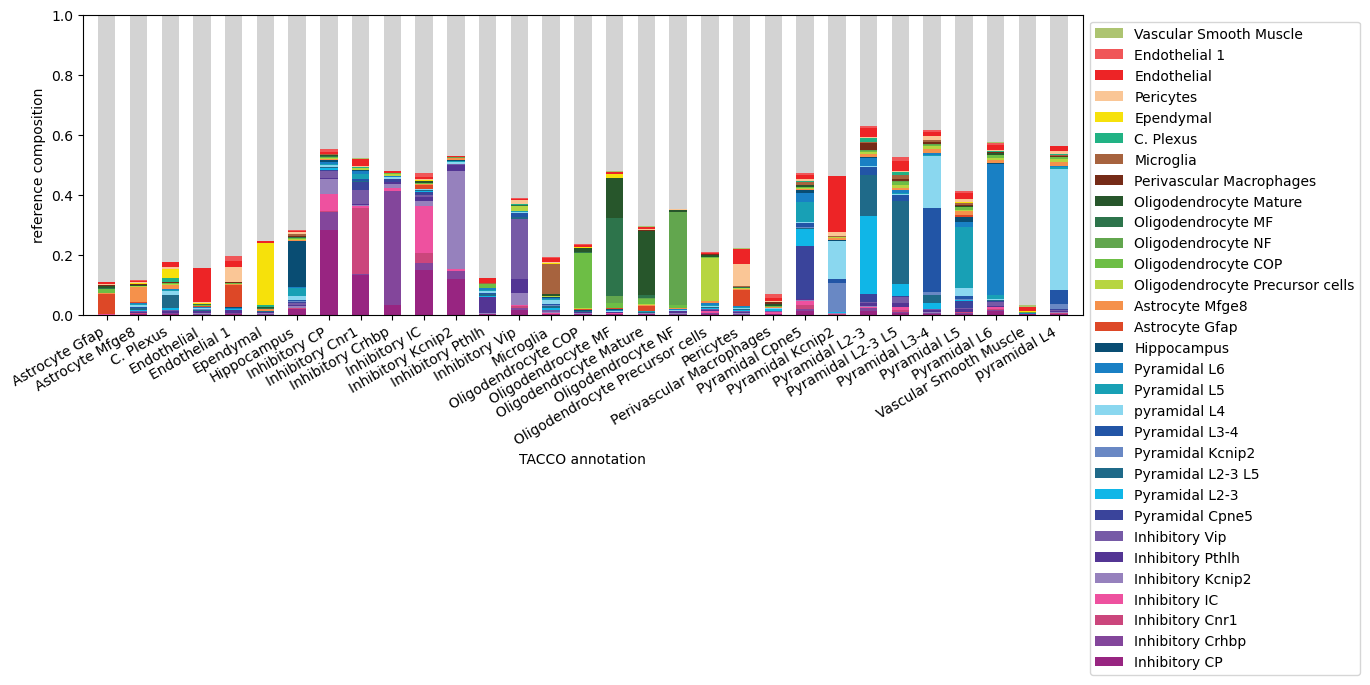

In [14]:
fig = tc.pl.compositions(seg_datas['TonT'], 'ClusterName', anno_col, colors=color_dict, reads=True, axsize=(10,3));
ax = fig.axes[0]
ax.set_ylabel('reference composition')
ax.set_xlabel('TACCO annotation')
fig.savefig(f'{data_path}/single_molecule_compositions.pdf',bbox_inches='tight')

Find spatial layered structure using the TACCO segmented data

co_occurrence: The argument `distance_key` is `None`, meaning that the distance which is now calculated on the fly will not be saved. Providing a precalculated distance saves time in multiple calls to this function.
calculating distance for sample 1/1


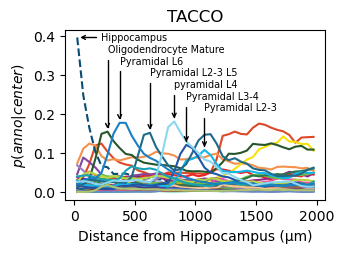

In [15]:
analysis_key=f'{anno_col}-{anno_col}'
tc.tl.co_occurrence(seg_datas['TonT'], anno_col, delta_distance=50, max_distance=2000, sparse=False, result_key=analysis_key);
fig = tc.pl.co_occurrence(seg_datas['TonT'], analysis_key, score_key='composition', colors=color_dict, wspace=0.3, show_only_center=['Hippocampus'], legend=False, axsize=(2.6,1.7), grid=False);
# annotate selected peaks in the data
ax = fig.get_axes()[0]
selection = pd.DataFrame({'anno':['Hippocampus','Oligodendrocyte Mature','Pyramidal L2-3','Pyramidal L2-3 L5','Pyramidal L3-4','pyramidal L4','Pyramidal L6']})
all_annotations = seg_datas['TonT'].uns[analysis_key]['annotation']
selection['anno_idx'] = selection['anno'].map(lambda x: np.argmax(all_annotations == x))
lines = ax.get_lines()
selection['y'] = selection['anno_idx'].map(lambda x: lines[x].get_ydata()[np.argmax(lines[x].get_ydata())])
selection['x'] = selection['anno_idx'].map(lambda x: lines[x].get_xdata()[np.argmax(lines[x].get_ydata())])
selection.sort_values('x', inplace=True)
for i,row in enumerate(selection.itertuples()):
    arrowprops = dict(arrowstyle="->",connectionstyle="arc", relpos=(0., 0.5))
    ax.annotate(row.anno,
            xy=(row.x, row.y), xycoords='data', ha="left", va="center", fontsize='x-small',
            xytext=(row.x + (200 if i==0 else 0), selection['y'].max()-0.21*i/len(selection)), textcoords='data',
            arrowprops=arrowprops,
            )
ax.set_title(f'TACCO')
ax.set_ylabel(f'$p(anno|center)$')
ax.set_xlabel(f'Distance from Hippocampus (µm)')
fig.savefig(f'{data_path}/single_molecule_layer{hr_ext}.pdf',bbox_inches='tight')